In [1]:
!pip install six

In [2]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/decision_trees

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 259, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 259 (delta 2), reused 5 (delta 1), pack-reused 252
Receiving objects: 100% (259/259), 41.18 MiB | 18.23 MiB/s, done.
Resolving deltas: 100% (125/125), done.
/content/machine_learning_1/decision_trees


In [3]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.metrics as sk_metrics
import tempfile
import os
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
import utils

In [4]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'

features = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness',
            'concavity', 'concave_poinits', 'symmetry', 'fractal_dimension']
column_names = ['id', 'diagnosis']

for attr in ['mean', 'ste', 'largest']:
  for feature in features:
    column_names.append(feature + "_" + attr)

In [5]:
dataset = pd.read_csv(url, names=column_names)
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_poinits_mean,...,radius_largest,texture_largest,perimeter_largest,area_largest,smoothness_largest,compactness_largest,concavity_largest,concave_poinits_largest,symmetry_largest,fractal_dimension_largest
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
dataset.shape

(569, 32)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         569 non-null    int64  
 1   diagnosis                  569 non-null    object 
 2   radius_mean                569 non-null    float64
 3   texture_mean               569 non-null    float64
 4   perimeter_mean             569 non-null    float64
 5   area_mean                  569 non-null    float64
 6   smoothness_mean            569 non-null    float64
 7   compactness_mean           569 non-null    float64
 8   concavity_mean             569 non-null    float64
 9   concave_poinits_mean       569 non-null    float64
 10  symmetry_mean              569 non-null    float64
 11  fractal_dimension_mean     569 non-null    float64
 12  radius_ste                 569 non-null    float64
 13  texture_ste                569 non-null    float64

In [8]:
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_poinits_mean,symmetry_mean,...,radius_largest,texture_largest,perimeter_largest,area_largest,smoothness_largest,compactness_largest,concavity_largest,concave_poinits_largest,symmetry_largest,fractal_dimension_largest
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
dataset.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave_poinits_mean         0
symmetry_mean                0
fractal_dimension_mean       0
radius_ste                   0
texture_ste                  0
perimeter_ste                0
area_ste                     0
smoothness_ste               0
compactness_ste              0
concavity_ste                0
concave_poinits_ste          0
symmetry_ste                 0
fractal_dimension_ste        0
radius_largest               0
texture_largest              0
perimeter_largest            0
area_largest                 0
smoothness_largest           0
compactness_largest          0
concavity_largest            0
concave_poinits_largest      0
symmetry_largest             0
fractal_dimension_largest    0
dtype: i

In [10]:
train_dataset = dataset.sample(frac=0.75, random_state=1)
test_dataset = dataset.drop(train_dataset.index)
x_train, y_train = train_dataset.iloc[:, 2:], train_dataset.iloc[:, 1]
x_test, y_test = test_dataset.iloc[:, 2:], test_dataset.iloc[:, 1]

In [11]:
y_train, y_test = y_train.map({'B': 0, 'M': 1}), y_test.map({'B': 0, 'M': 1})

In [12]:
x_train.head(10)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_poinits_mean,symmetry_mean,fractal_dimension_mean,...,radius_largest,texture_largest,perimeter_largest,area_largest,smoothness_largest,compactness_largest,concavity_largest,concave_poinits_largest,symmetry_largest,fractal_dimension_largest
421,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.46,18.34,114.10,809.2,0.13120,0.36350,0.3219,0.11080,0.2827,0.09208
47,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,15.67,27.95,102.80,759.4,0.17860,0.41660,0.5006,0.20880,0.3900,0.11790
292,12.95,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.03370,0.1730,0.06470,...,13.74,19.93,88.81,585.4,0.14830,0.20680,0.2241,0.10560,0.3380,0.09584
186,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.24450,0.3538,0.15710,0.3206,0.06938
414,15.13,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.02739,0.1852,0.05294,...,17.26,36.91,110.10,931.4,0.11480,0.09866,0.1547,0.06575,0.3233,0.06165
132,16.16,21.54,106.20,809.8,0.10080,0.12840,0.10430,0.05613,0.2160,0.05891,...,19.47,31.68,129.70,1175.0,0.13950,0.30550,0.2992,0.13120,0.3480,0.07619
161,19.19,15.94,126.30,1157.0,0.08694,0.11850,0.11930,0.09667,0.1741,0.05176,...,22.03,17.81,146.60,1495.0,0.11240,0.20160,0.2264,0.17770,0.2443,0.06251
197,18.08,21.84,117.40,1024.0,0.07371,0.08642,0.11030,0.05778,0.1770,0.05340,...,19.76,24.70,129.10,1228.0,0.08822,0.19630,0.2535,0.09181,0.2369,0.06558
245,10.48,19.86,66.72,337.7,0.10700,0.05971,0.04831,0.03070,0.1737,0.06440,...,11.48,29.46,73.68,402.8,0.15150,0.10260,0.1181,0.06736,0.2883,0.07748
453,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,0.1650,0.06121,...,15.80,16.93,103.10,749.9,0.13470,0.14780,0.1373,0.10690,0.2606,0.07810


In [13]:
x_train.shape

(427, 30)

In [14]:
x_train.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_poinits_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_ste', 'texture_ste', 'perimeter_ste', 'area_ste',
       'smoothness_ste', 'compactness_ste', 'concavity_ste',
       'concave_poinits_ste', 'symmetry_ste', 'fractal_dimension_ste',
       'radius_largest', 'texture_largest', 'perimeter_largest',
       'area_largest', 'smoothness_largest', 'compactness_largest',
       'concavity_largest', 'concave_poinits_largest', 'symmetry_largest',
       'fractal_dimension_largest'],
      dtype='object')

In [15]:
y_train.head(10)

421    0
47     1
292    0
186    1
414    1
132    1
161    1
197    1
245    0
453    0
Name: diagnosis, dtype: int64

In [16]:
x_train.shape

(427, 30)

In [17]:
# use all data with standard scaler
# use "sag" solver

clf = LogisticRegression(solver="sag")

clf.fit(preprocessing.StandardScaler().fit_transform(x_train), y_train)
clf.score(preprocessing.StandardScaler().fit_transform(x_test), y_test)*100

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


98.59154929577466

In [18]:
svm = SVC(kernel='rbf', gamma=0.05,C=50)
svm.fit(preprocessing.StandardScaler().fit_transform(x_train), y_train)

print("Train Accuracy:", svm.score(preprocessing.StandardScaler().fit_transform(x_train), y_train)*100)
print("Test Accuracy:", svm.score(preprocessing.StandardScaler().fit_transform(x_test), y_test)*100)

Train Accuracy: 100.0
Test Accuracy: 98.59154929577466


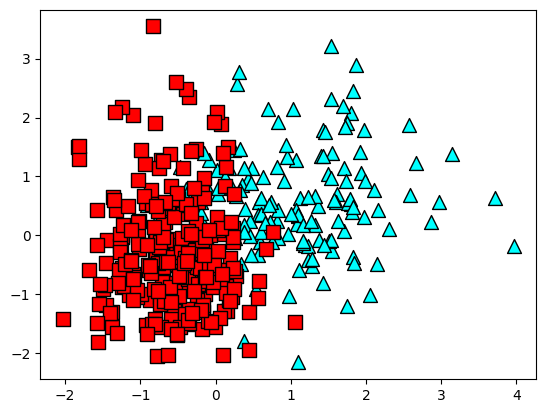

In [19]:
# Plot the points
utils.plot_points(preprocessing.StandardScaler().fit_transform(x_train), y_train)

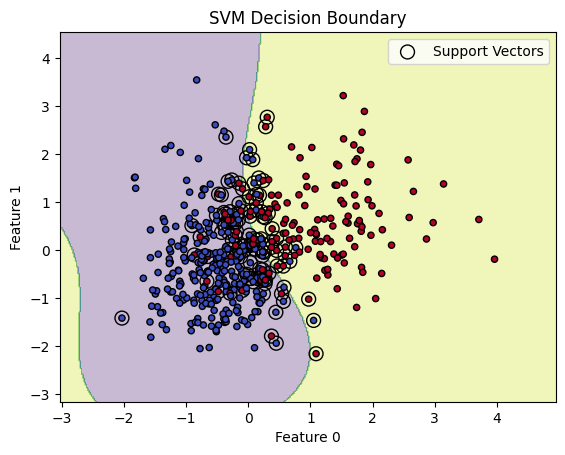

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Select two features for visualization
feature1_index = 0  # Index of the first feature
feature2_index = 1  # Index of the second feature

# Extract the selected features from the normalized dataset
x_train_subset = preprocessing.StandardScaler().fit_transform(x_train)[:, [feature1_index, feature2_index]]

# Fit SVM model on the subset of features
svm.fit(x_train_subset, y_train)

# Define the meshgrid
x_min, x_max = x_train_subset[:, 0].min() - 1, x_train_subset[:, 0].max() + 1
y_min, y_max = x_train_subset[:, 1].min() - 1, x_train_subset[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Plot decision boundary
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)

# Plot support vectors
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')

# Plot data points
plt.scatter(x_train_subset[:, 0], x_train_subset[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

plt.xlabel('Feature {}'.format(feature1_index))
plt.ylabel('Feature {}'.format(feature2_index))
plt.title('SVM Decision Boundary')
plt.legend()
plt.show()


In [22]:
x_train_subset

array([[ 1.55108625e-01, -1.28147138e+00],
       [-2.76148077e-01, -1.42317303e-01],
       [-3.38566810e-01, -7.84917038e-01],
       [ 1.18218051e+00, -1.61790023e-01],
       [ 2.79946091e-01,  2.57169294e+00],
       [ 5.72179251e-01,  5.58700589e-01],
       [ 1.43185544e+00, -8.04389758e-01],
       [ 1.11692456e+00,  6.31723286e-01],
       [-1.03935895e+00,  1.49773485e-01],
       [ 1.09713183e-01, -1.28147138e+00],
       [-8.80474902e-01, -5.87755756e-01],
       [ 1.32478678e-02,  1.11123900e+00],
       [ 5.94876972e-01, -1.15542314e-01],
       [-5.05962503e-01, -1.71526382e-01],
       [ 1.69294701e-01,  1.50312747e+00],
       [-3.58427316e-01, -2.49417259e-01],
       [-5.51357945e-01, -9.82078321e-01],
       [-6.98893133e-01, -7.48405690e-01],
       [-1.01382401e+00,  2.37400722e-01],
       [ 1.79785619e+00,  5.39227870e-01],
       [-3.92473897e-01, -9.85036852e-02],
       [-7.30102499e-01, -4.98218871e-02],
       [ 1.54534404e+00,  1.40089570e+00],
       [-3.

In [23]:
x_train_subset.shape

(427, 2)